# Analisis de jugadores de Argentinos Juniors

## Introducción
Se hace un analisis del rendimiento de los jugadores de Argentinos Juniors del 2015 al 2022. 
Se toman los datos del portal: www.whoscored.com 

## Objetivo
Comprender los rendimientos de cada uno de los jugadores.

## Contexto comercial
En un futuro, se agregarán los valores económicos de "Transfermarket" para realizar un analisis más detallado.

In [33]:
pip install tabulate


Note: you may need to restart the kernel to use updated packages.


**Se importa el archivo**

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Lee el archivo de Excel
dataframe = pd.read_excel('AAAJ.xlsx')

# Muestra los datos
print(dataframe)


          Year         Player     CM    KG  Apps   Mins  Goals  Assists  Yel  \
0    2016/2016          PIOVI  180.0  72.0    11  990.0    0.0      0.0  4.0   
1    2016/2016           LASO  185.0  79.0    10  874.0    0.0      0.0  5.0   
2    2016/2016     LANZILLOTA  185.0  80.0    10  900.0    0.0      0.0  0.0   
3    2016/2016         FREIRE  186.0  80.0     9  867.0    0.0      0.0  0.0   
4    2016/2016          ROLON  178.0  70.0    11  967.0    0.0      1.0  5.0   
..         ...            ...    ...   ...   ...    ...    ...      ...  ...   
168  2022/2022      MINISSALE  182.0  79.0  5(1)  413.0    0.0      0.0  3.0   
169  2022/2022         OVANDO  172.0  72.0  0(6)   67.0    0.0      0.0  0.0   
170  2022/2022        CORONEL  172.0  70.0  0(4)  103.0    0.0      0.0  0.0   
171  2022/2022  LUCIANO GOMEZ  163.0  66.0  3(6)  222.0    0.0      0.0  0.0   
172  2022/2022           LUGO  170.0  65.0  0(1)    1.0    0.0      0.0  0.0   

     Red  SpG    PS%  AerialsWon  MotM 

**Cantidad de minutos jugados entre 2016 y 2022**

C:\Users\rodri\AppData\Local\Temp\ipykernel_3012\1368462514.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data = dataframe.groupby('Player').sum().reset_index()


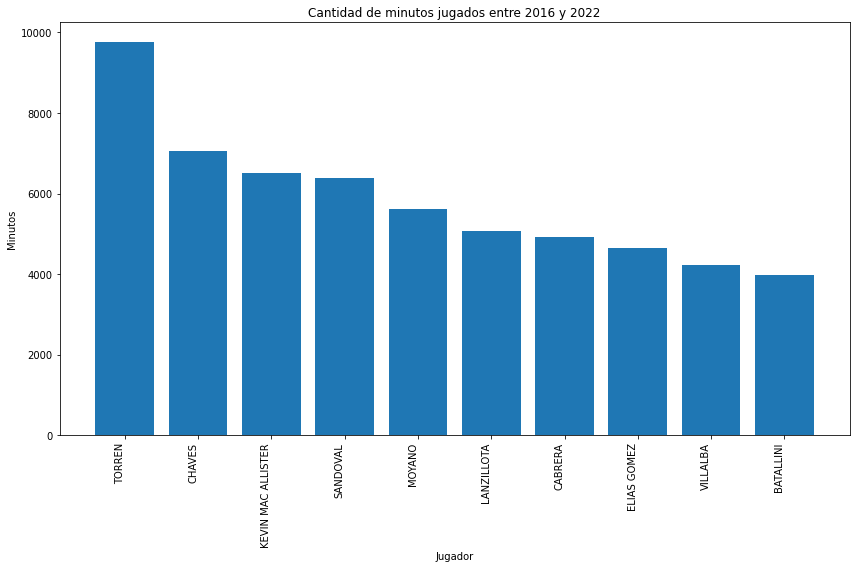

time: 391 ms (started: 2023-07-07 20:23:12 -03:00)


In [49]:

# Sumar los valores por jugador
grouped_data = dataframe.groupby('Player').sum().reset_index()

# Obtener los 10 jugadores con mayor cantidad de minutos
top_players = grouped_data.nlargest(10, 'Mins')

# Crear el gráfico de barras
plt.figure(figsize=(12, 8))  # Ajusta el tamaño de la figura según tus preferencias
plt.bar(top_players['Player'], top_players['Mins'])
plt.title('Cantidad de minutos jugados entre 2016 y 2022')
plt.xlabel('Jugador')
plt.ylabel('Minutos')
plt.xticks(rotation=90, ha='right')  # Ajusta la rotación y alineación de las etiquetas en el eje x
plt.subplots_adjust(bottom=0.3)  # Ajusta los márgenes inferiores para mostrar todas las etiquetas
plt.tight_layout()
plt.show()



**Cantidad de minutos jugados por temporada**

In [66]:
top_players = dataframe.groupby('Year').apply(lambda x: x.nlargest(10, 'Mins')).reset_index(drop=True)


time: 31 ms (started: 2023-07-07 20:46:40 -03:00)


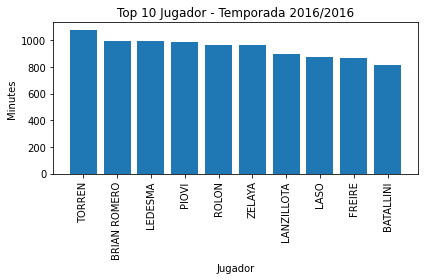

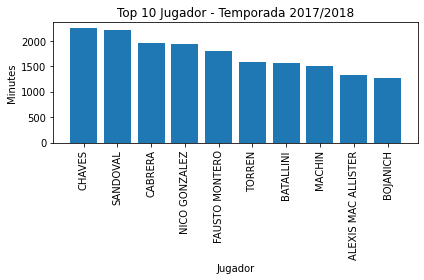

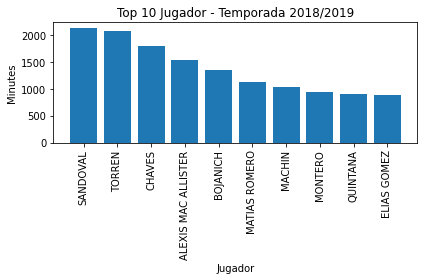

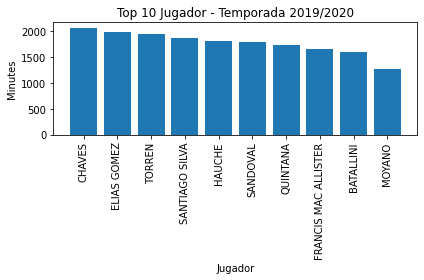

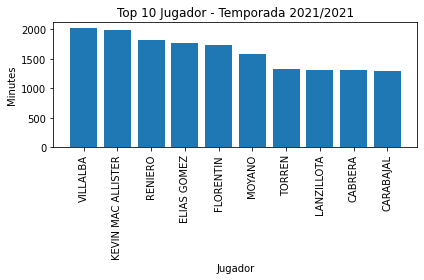

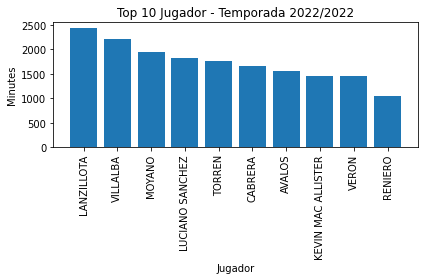

time: 2 s (started: 2023-07-07 20:46:41 -03:00)


In [67]:
for year, year_data in top_players.groupby('Year'):
    plt.figure()
    plt.bar(year_data['Player'], year_data['Mins'])
    plt.title(f'Top 10 Jugador - Temporada {year}')
    plt.xlabel('Jugador')
    plt.ylabel('Minutes')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()


**Cantidad de minutos jugados entre 2016 y 2022**

C:\Users\rodri\AppData\Local\Temp\ipykernel_3012\2942714070.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data = dataframe.groupby('Player').sum().reset_index()


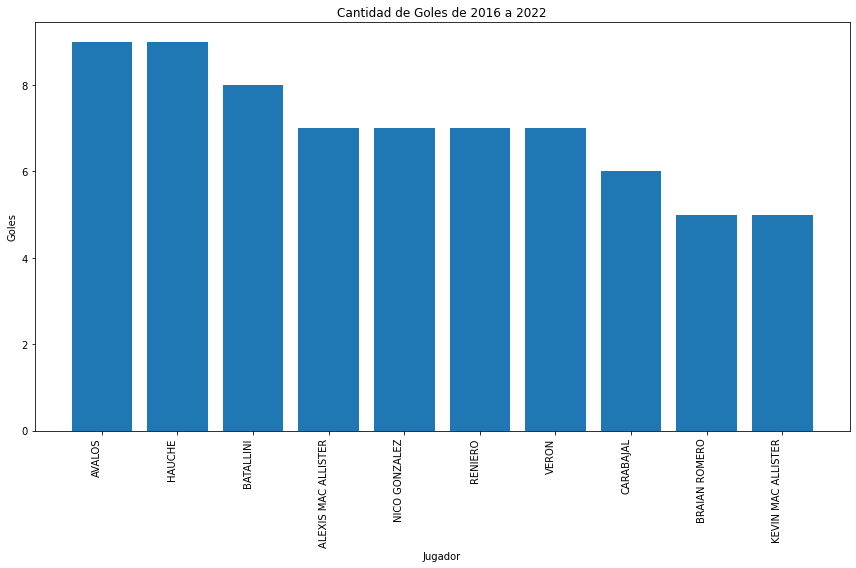

time: 453 ms (started: 2023-07-07 20:39:38 -03:00)


In [55]:

dataframe = pd.read_excel('AAAJ.xlsx')

# Sumar los valores por jugador
grouped_data = dataframe.groupby('Player').sum().reset_index()

# Obtener los 10 jugadores con mayor cantidad de minutos
top_players = grouped_data.nlargest(10, 'Goals')

# Crear el gráfico de barras
plt.figure(figsize=(12, 8))  # Ajusta el tamaño de la figura según tus preferencias
plt.bar(top_players['Player'], top_players['Goals'])
plt.title('Cantidad de Goles de 2016 a 2022')
plt.xlabel('Jugador')
plt.ylabel('Goles')
plt.xticks(rotation=90, ha='right')  # Ajusta la rotación y alineación de las etiquetas en el eje x
plt.subplots_adjust(bottom=0.3)  # Ajusta los márgenes inferiores para mostrar todas las etiquetas
plt.tight_layout()
plt.show()



**Cantidad de goles por temporada entre 2016 y 2022**

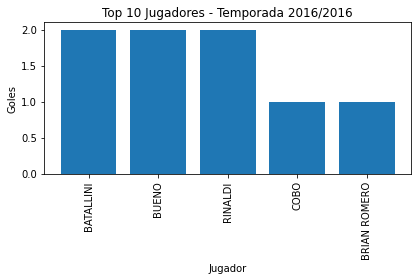

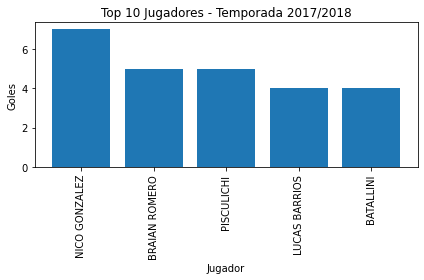

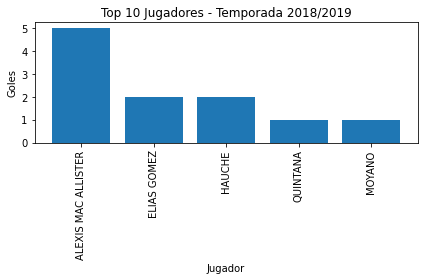

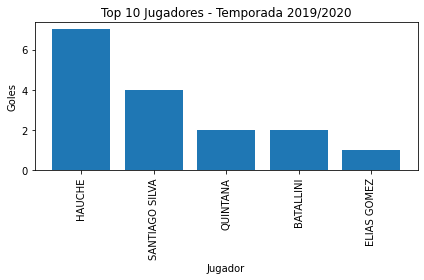

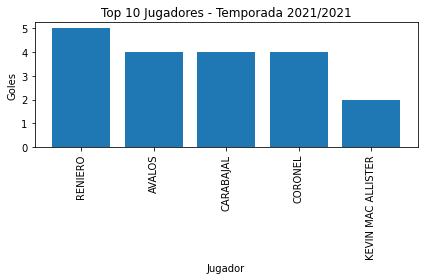

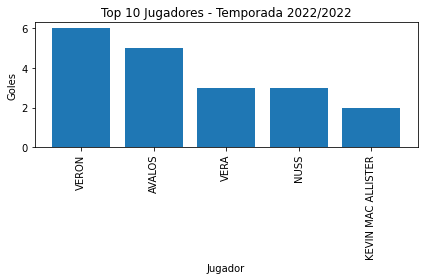

time: 1.44 s (started: 2023-07-07 20:39:53 -03:00)


In [56]:
top_players = dataframe.groupby('Year').apply(lambda x: x.nlargest(5, 'Goals')).reset_index(drop=True)
for year, year_data in top_players.groupby('Year'):
    plt.figure()
    plt.bar(year_data['Player'], year_data['Goals'])
    plt.title(f'Top 10 Jugadores - Temporada {year}')
    plt.xlabel('Jugador')
    plt.ylabel('Goles')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

**Rendimiento promedio de los 5 mejores jugadores en cada temporada**

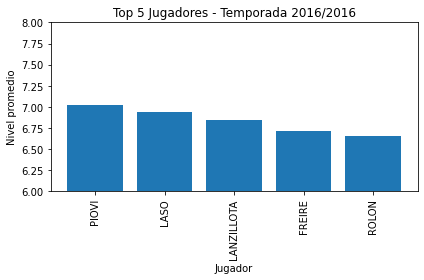

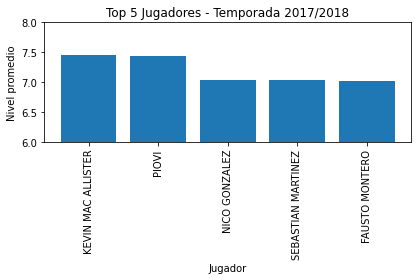

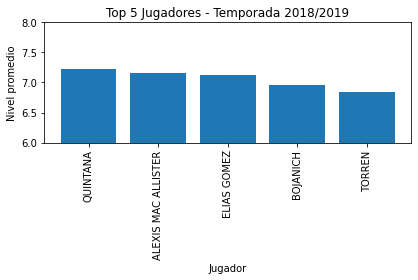

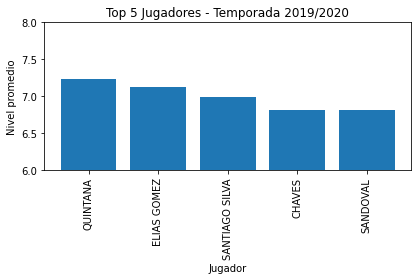

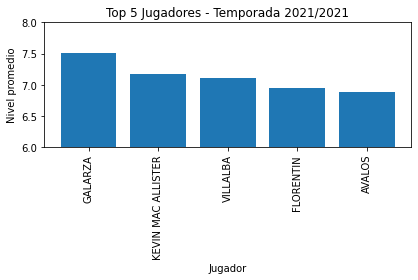

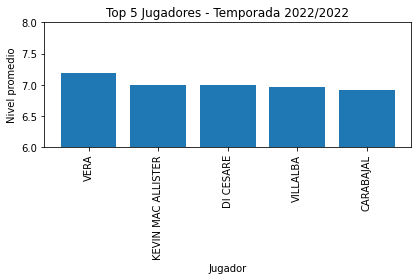

time: 1.53 s (started: 2023-07-07 20:40:02 -03:00)


In [57]:
top_players = dataframe.groupby('Year').apply(lambda x: x.nlargest(5, 'Rating')).reset_index(drop=True)
for year, year_data in top_players.groupby('Year'):
    plt.figure()
    plt.bar(year_data['Player'], year_data['Rating'])
    plt.title(f'Top 5 Jugadores - Temporada {year}')
    plt.xlabel('Jugador')
    plt.ylabel('Nivel promedio')
    plt.xticks(rotation=90)
    plt.ylim(6, 8)  # Establece el rango del eje Y
    plt.tight_layout()
    plt.show()

**Cantidad de asistencias entre 2016 y 2022**

C:\Users\rodri\AppData\Local\Temp\ipykernel_3012\3031429652.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data = dataframe.groupby('Player').sum().reset_index()


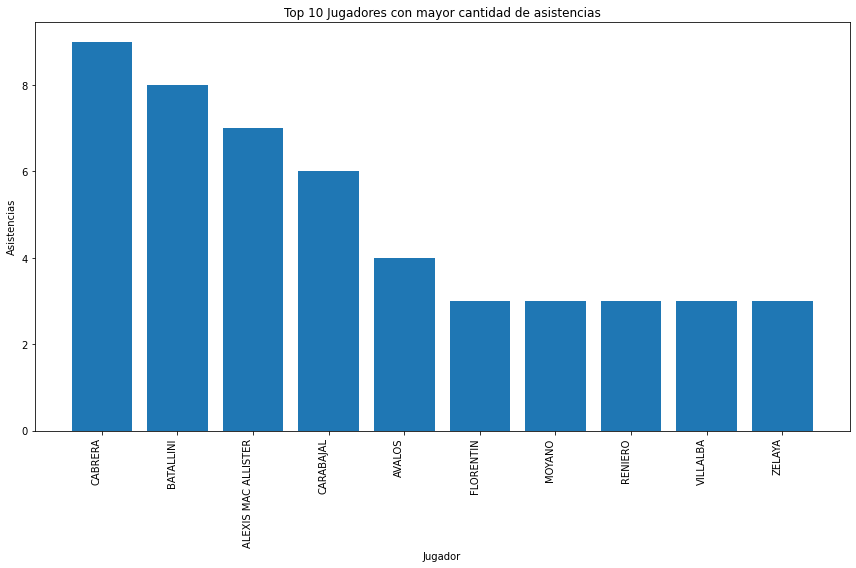

time: 469 ms (started: 2023-07-07 20:40:16 -03:00)


In [58]:


dataframe = pd.read_excel('AAAJ.xlsx')

# Sumar los valores por jugador
grouped_data = dataframe.groupby('Player').sum().reset_index()

# Obtener los 10 jugadores con mayor cantidad de minutos
top_players = grouped_data.nlargest(10, 'Assists')

# Crear el gráfico de barras
plt.figure(figsize=(12, 8))  # Ajusta el tamaño de la figura según tus preferencias
plt.bar(top_players['Player'], top_players['Assists'])
plt.title('Top 10 Jugadores con mayor cantidad de asistencias')
plt.xlabel('Jugador')
plt.ylabel('Asistencias')
plt.xticks(rotation=90, ha='right')  # Ajusta la rotación y alineación de las etiquetas en el eje x
plt.subplots_adjust(bottom=0.3)  # Ajusta los márgenes inferiores para mostrar todas las etiquetas
plt.tight_layout()
plt.show()


**Cantidad de asistencias en cada temporada por jugador entre 2016 y 2022**

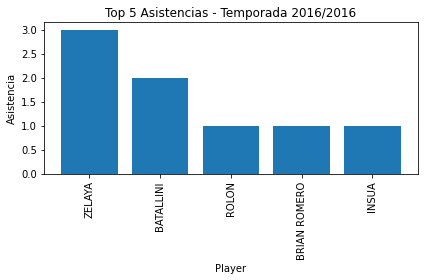

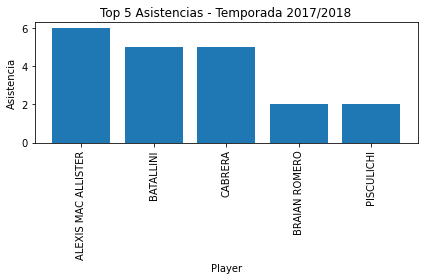

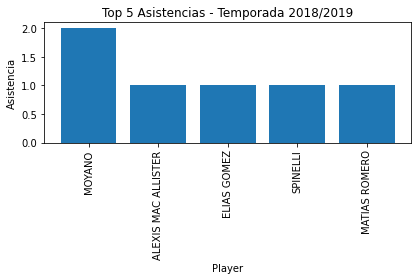

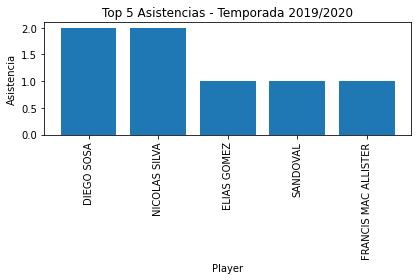

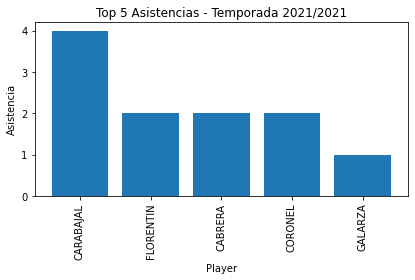

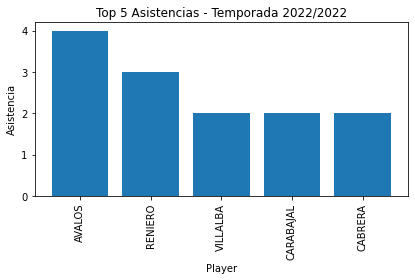

time: 1.47 s (started: 2023-07-07 20:43:19 -03:00)


In [61]:
top_players = dataframe.groupby('Year').apply(lambda x: x.nlargest(5, 'Assists')).reset_index(drop=True)
for year, year_data in top_players.groupby('Year'):
    plt.figure()
    plt.bar(year_data['Player'], year_data['Assists'])
    plt.title(f'Top 5 Asistencias - Temporada {year}')
    plt.xlabel('Player')
    plt.ylabel('Asistencia')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

C:\Users\rodri\AppData\Local\Temp\ipykernel_3012\181791925.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data = dataframe.groupby('Player').sum().reset_index()


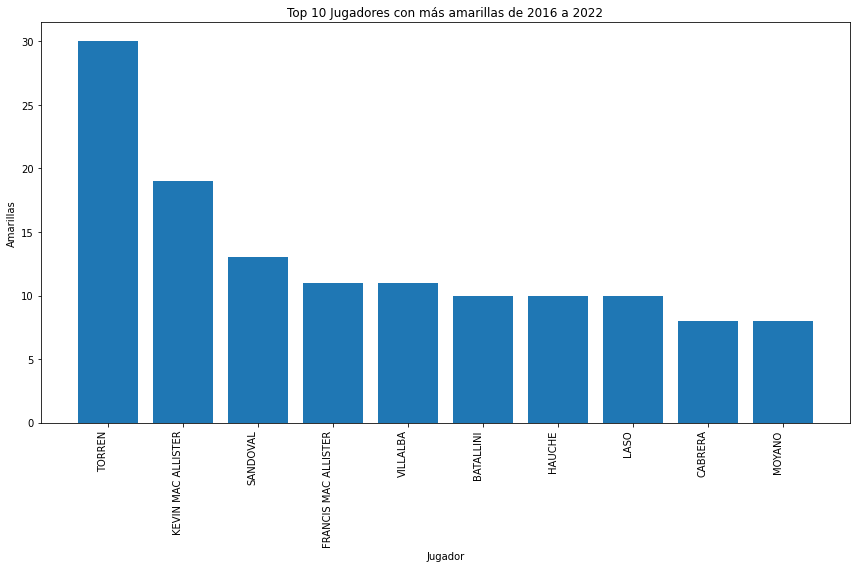

time: 516 ms (started: 2023-07-07 20:43:29 -03:00)


In [62]:
import pandas as pd
import matplotlib.pyplot as plt

dataframe = pd.read_excel('AAAJ.xlsx')

# Sumar los valores por jugador
grouped_data = dataframe.groupby('Player').sum().reset_index()

# Obtener los 10 jugadores con mayor cantidad de minutos
top_players = grouped_data.nlargest(10, 'Yel')

# Crear el gráfico de barras
plt.figure(figsize=(12, 8))  # Ajusta el tamaño de la figura según tus preferencias
plt.bar(top_players['Player'], top_players['Yel'])
plt.title('Top 10 Jugadores con más amarillas de 2016 a 2022')
plt.xlabel('Jugador')
plt.ylabel('Amarillas')
plt.xticks(rotation=90, ha='right')  # Ajusta la rotación y alineación de las etiquetas en el eje x
plt.subplots_adjust(bottom=0.3)  # Ajusta los márgenes inferiores para mostrar todas las etiquetas
plt.tight_layout()
plt.show()


**Cantidad de rojas por temporada**

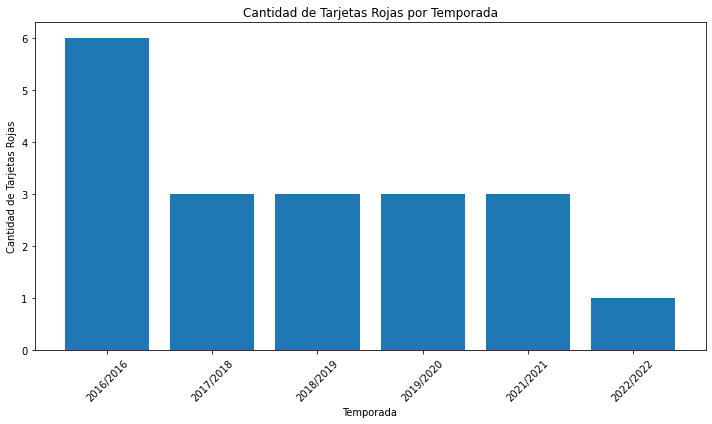

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

dataframe = pd.read_excel('AAAJ.xlsx')

# Sumar las tarjetas rojas por temporada
red_cards_by_season = dataframe.groupby('Year')['Red'].sum()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))  # Ajusta el tamaño de la figura según tus preferencias
plt.bar(red_cards_by_season.index, red_cards_by_season.values)
plt.title('Cantidad de Tarjetas Rojas por Temporada')
plt.xlabel('Temporada')
plt.ylabel('Cantidad de Tarjetas Rojas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Jugadores con más duelos aéreos ganados por partido de 2016 a 2022**

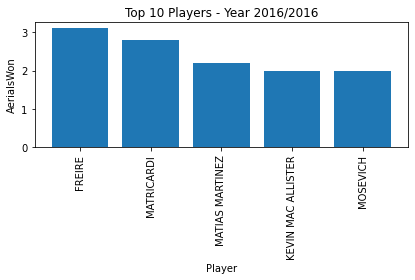

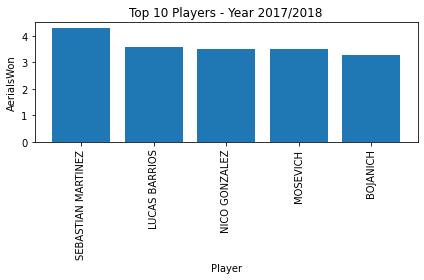

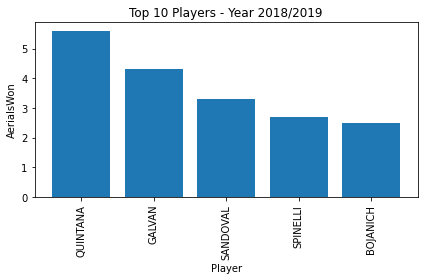

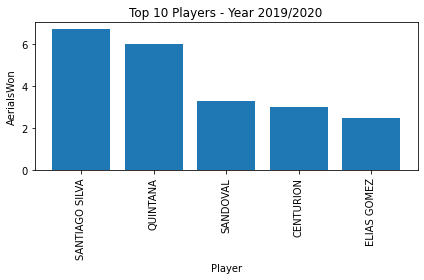

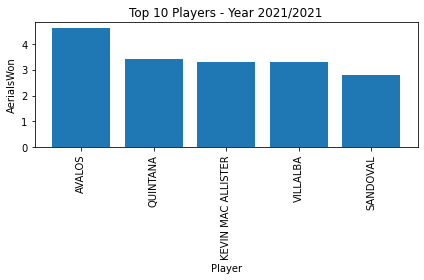

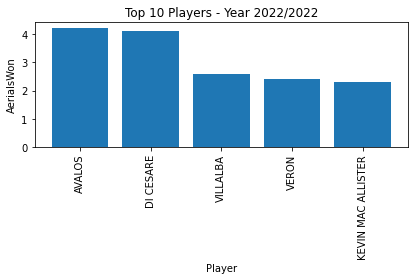

time: 1.42 s (started: 2023-07-07 20:43:44 -03:00)


In [63]:
top_players = dataframe.groupby('Year').apply(lambda x: x.nlargest(5, 'AerialsWon')).reset_index(drop=True)
for year, year_data in top_players.groupby('Year'):
    plt.figure()
    plt.bar(year_data['Player'], year_data['AerialsWon'])
    plt.title(f'Top 10 Players - Year {year}')
    plt.xlabel('Player')
    plt.ylabel('AerialsWon')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

## AHORA SE TOMAN DATOS DEL NIVEL DEL FIFA 2022

Son muy discutibles los niveles. Por ejemplo, para el FIFA el mejor jugador por nivel es Kalinski

C:\Users\rodri\AppData\Local\Temp\ipykernel_3012\4010791220.py:7: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  FIFA = pd.read_csv(csv_file)


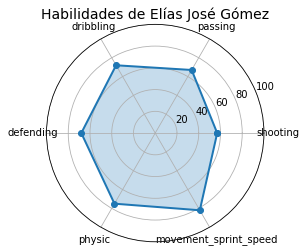

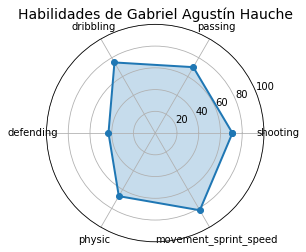

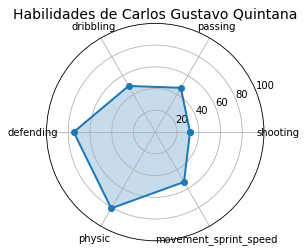

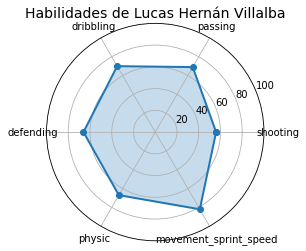

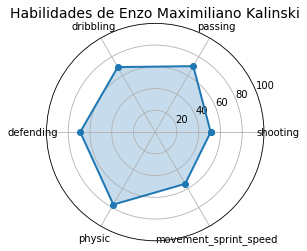

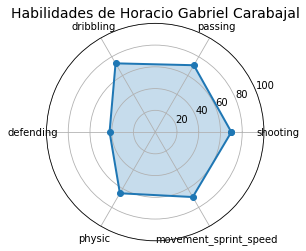

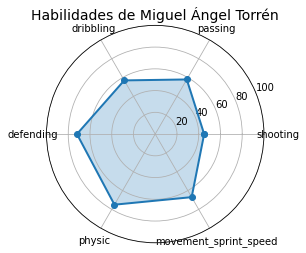

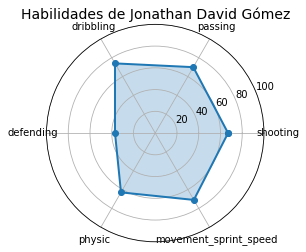

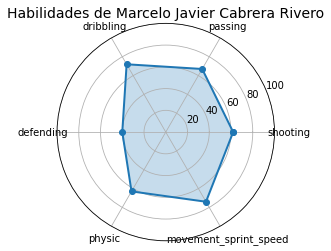

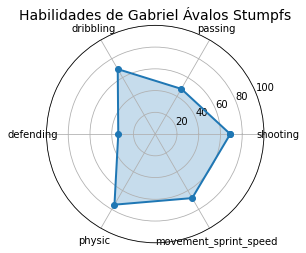

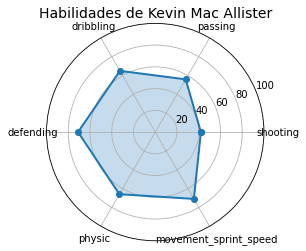

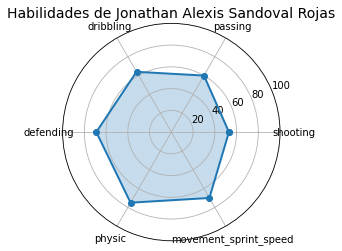

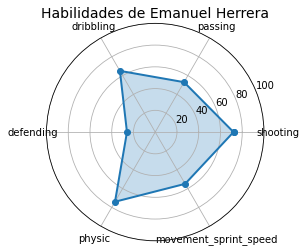

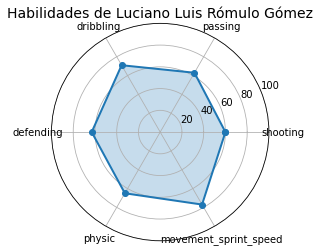

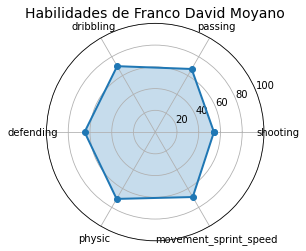

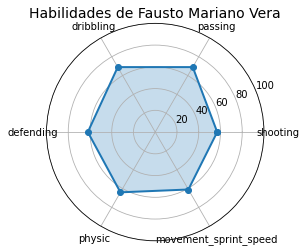

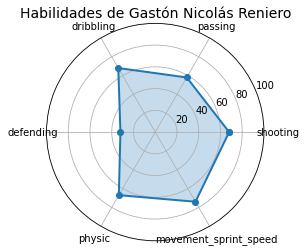

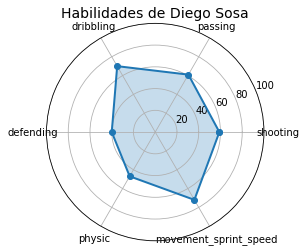

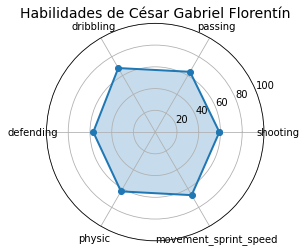

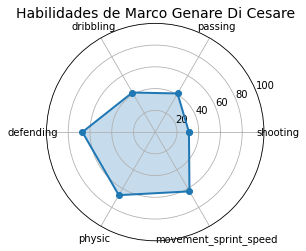

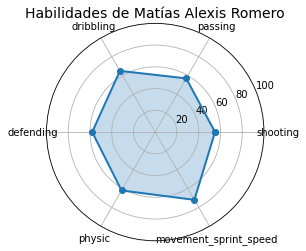

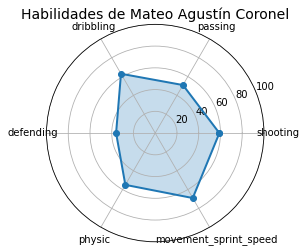

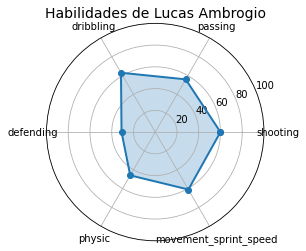

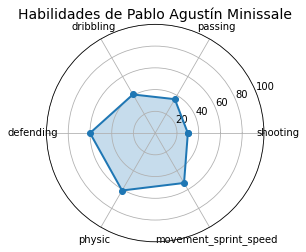

time: 6.11 s (started: 2023-07-07 18:48:06 -03:00)


In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Cargar el archivo CSV
csv_file = "players_22.csv"
FIFA = pd.read_csv(csv_file)

# Filtrar el DataFrame para obtener los datos de los jugadores de campo de Argentinos Juniors
Argentinos_Juniors_data = FIFA[(FIFA['club_name'] == 'Argentinos Juniors') & (FIFA['goalkeeping_diving'] <= 50)]

# Seleccionar las variables de interés
variables = ['shooting', 'passing', 'dribbling', 'defending', 'physic', "movement_sprint_speed"]

# Iterar sobre los jugadores y generar un gráfico de telaraña para cada uno
for _, player_row in Argentinos_Juniors_data.iterrows():
    player_name = player_row['long_name']
    player_values = player_row[variables].values.tolist()
    player_values.append(player_values[0])  # Agregar el primer valor al final para cerrar el polígono
    
    # Configurar el gráfico de telaraña
    fig, ax = plt.subplots(figsize=(4, 4), subplot_kw={'polar': True})
    
    # Calcular los ángulos para cada variable
    angles = np.linspace(0, 2 * np.pi, len(variables), endpoint=False).tolist()
    angles += angles[:1]
    
    # Dibujar el gráfico de telaraña para el jugador actual
    ax.plot(angles, player_values, 'o-', linewidth=2)
    ax.fill(angles, player_values, alpha=0.25)
    
    # Configurar las etiquetas de las variables
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(variables)
    
    # Configurar el rango de los valores
    ax.set_ylim(0, 100)
    
    # Configurar el título del gráfico con el nombre del jugador
    ax.set_title(f'Habilidades de {player_name}', size=14)
    
    # Mostrar el gráfico de telaraña para el jugador actual
    plt.show()
